# Autocorrelação, PSD e cálculos de potência

## Autor: João Marcos Costa
### Data: 18/05/2017 (última atualização)

## Autocorrelação
### Definição estatística 
A função de autocorrelação ${R}_{xx}$ de um sinal aleatório descreve a dependência geral dos valores das amostras ao mesmo tempo sobre os valores das amostras em outro momento, visando encontrar padrões de repetição em sinais periódicos com ruido ou mesmo para identificar a frequência fundamental em falta num sinal implícita pelas suas frequências harmônicas.  

Define-se a autocorrelação de um sinal periódico como:
$${R}_{xx}(\tau)=\lim_{T\rightarrow \infty} \frac{1}{T}\int_{-T/2}^{T/2}x(t) \cdot  x(t+\tau)dt$$


Em que $T$ é o período de observação. $R_{xx}(\tau)$ é um número real cujo máximo está em $\tau=0$. 


Para um sinal amostrado, a autocorrelação é definida como:
 $$R_{xx}(m)=\frac{1}{N}\sum_{n=1}^{N-m+1}x(n) \cdot  x(n+m-1)$$

Para $m = 1,2, ... , M+1$ em que M é o número de atrasos. 

Por se tratar da análise de relação entre a função e ela mesma, podemos ter diversas aplicações como:


- Cancelamento de eco de um sinal causado pela reflexão em uma parede;
- Determinação da frequencia e potência de um sinal;
- Atraso entre sinais recebidos por sensores em posições diferentes (correlação cruzada).

Em sinais de energia, o resultado da autocorrelação nos fornece a função densidade de probabilidade da Energia, mais conhecida como ESD. Nos sinais de potência, o resultado é análogo: a autocorrelação fornece a PSD (Densidade espectral de potência).

### Cálculo
No código abaixo, calcularemos a autocorrelação de um sinal senoidal pela definição e compararemos com a saída da função _built-in_.
    

<IPython.core.display.Javascript object>


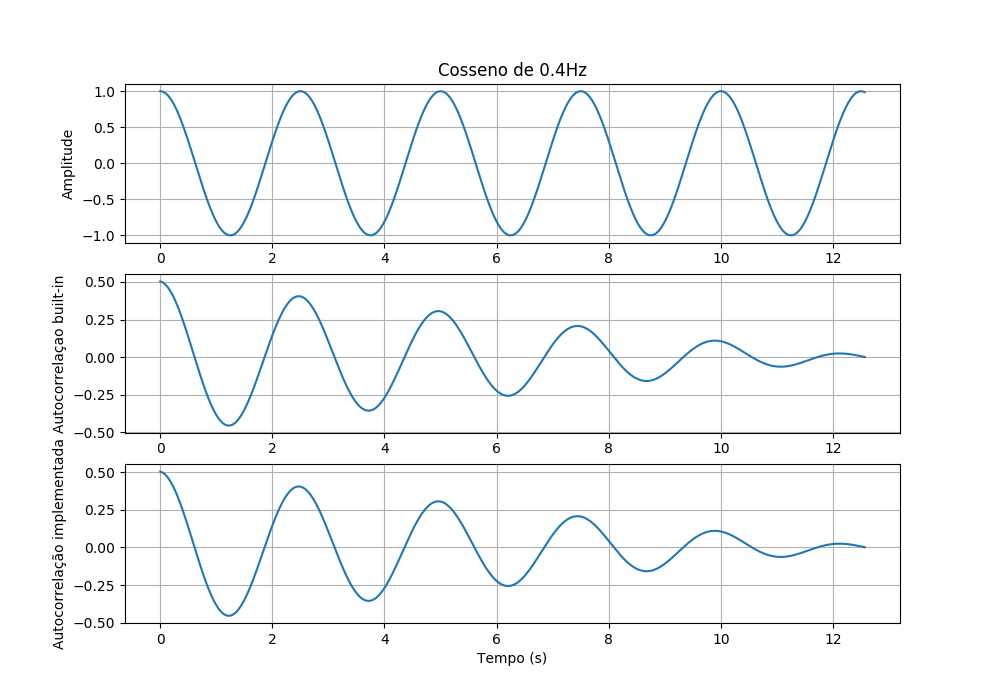

In [5]:
%matplotlib notebook
import numpy as np
fc=0.4
N = 1000
t = np.linspace(0,4*np.pi,N)
x = np.cos(2.0*np.pi*t*fc)
R_implementada = np.zeros([N],dtype = float)
#implementaçao:
for m in range(N):
    for n in range(N-m):
        R_implementada[m] = R_implementada[m]+x[n]*x[n+m]
R_implementada = R_implementada/N

from matplotlib import pyplot as plt

auto = np.correlate(x,x,'full')
auto = auto[int(auto.size/2):]/N

plt.figure(1,[10,7])

grafico_1 = plt.subplot(311)
plt.title("Cosseno de 0.4Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.plot(t,x)

grafico_2 = plt.subplot(312)
plt.ylabel("Autocorrelaçao built-in")
plt.grid()
plt.plot(t,auto)

grafico_3 = plt.subplot(313)
plt.plot(t,R_implementada)
plt.xlabel("Tempo (s)")
plt.ylabel("Autocorrelação implementada")
plt.grid()
plt.show()

